<a href="https://colab.research.google.com/github/LouisMiguelBernal/Iris-KNN/blob/main/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')
from ucimlrepo import fetch_ucirepo


In [ ]:
# fetch dataset
iris = fetch_ucirepo(id=53)
x = iris.data.features
y = iris.data.targets
df = pd.concat([X, y], axis=1)

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Data Peprocessing



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [ ]:
df['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#### Data Visualization

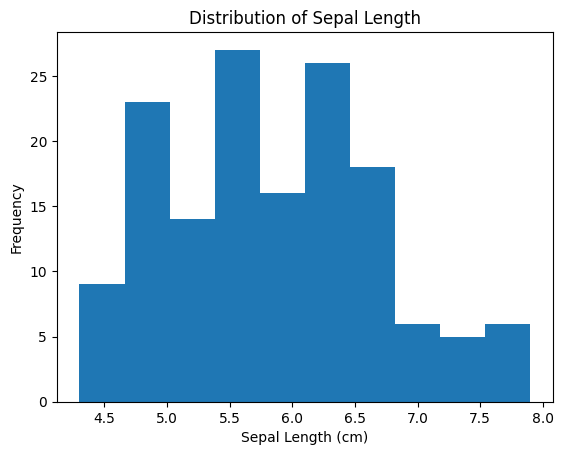

In [ ]:
plt.hist(df['sepal length'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()

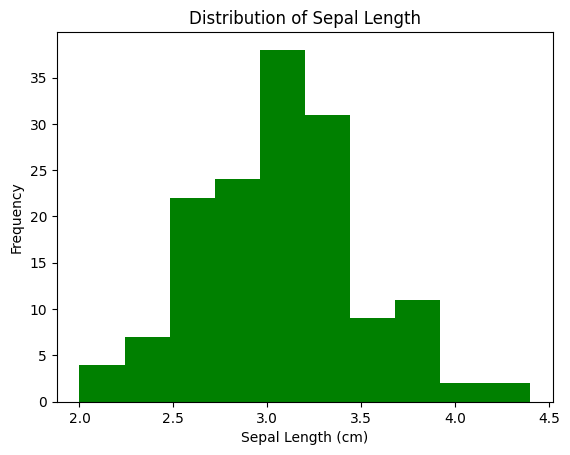

In [ ]:
plt.hist(df['sepal width'], color = 'green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()

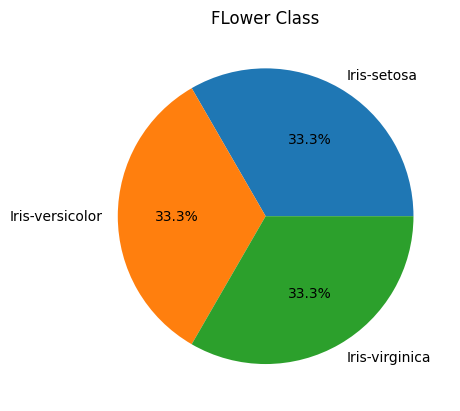

In [ ]:
df_class = df['class'].value_counts()

plt.pie(df_class, labels=df_class.index, autopct='%1.1f%%')
plt.title('FLower Class')
plt.show()

In [ ]:
num_df = df.select_dtypes(include = 'float')
num_df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


#### Train Test Split

In [ ]:
x = df.drop(['class'], axis = 1).values
y = df['class'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Prediction

### 5 neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# test prediction

new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample = sc.transform(new_sample)
prediction = knn.predict(new_sample)
print(prediction)

['Iris-setosa']


In [ ]:
k_values = [5, 10, 15, 20, 25]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')

    print(f'For k = {k}')
    print('Accuracy :', accuracy)
    print('F1 Score :', f1)
    print('Recall :', recall)
    print('Precision :', precision)
    print('\n')

For k = 5
Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


For k = 10
Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


For k = 15
Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


For k = 20
Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


For k = 25
Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0




Interpretation

1. Based on the measurements of the sepals and petals, iris flowers were categorized using the K-Nearest Neighbors (KNN) method. We experimented with several values of K (5, 10, 15, 20, 25,...) to see how they affected the model's performance. Which the projects done in systematic manner of preprocesising the data and visualizing important features for the modeling of prediction

Observation

2. For every tested value of K, the model produced an F1-score of 1.0 and flawless accuracy of 1.0. This shows that, independent of the K value used, the model accurately classified every case in the test set. Which means the model is accurate despite any number of K is used

Results

3. The outcomes show that, when it comes to categorizing iris flowers according to the given features, the KNN algorithm performs exceptionally well. Perfect accuracy and an F1-score were obtained for every tested value of K, indicating that the model is resilient and insensitive to small changes in K within the tested range.

Discussion

4. Relatively to the model constructed, the Iris dataset is has only few rows and smaller features. It has well-organized inputs of data which enables the model to learn be accurate. Also no null values detected and correct information are provided on each rows of the dataset